<a href="https://colab.research.google.com/github/ClausGB/Calculo_Aplicado/blob/main/VolumenEnvases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAMA DE DISEÑO DE ENVASES ASIMÉTRICOS
Usando Cálculo Integral para Volúmenes Irregulares
Calculando botella de vino...
Calculando botella de diseño...
Calculando envase ergonómico...

Generando visualizaciones...


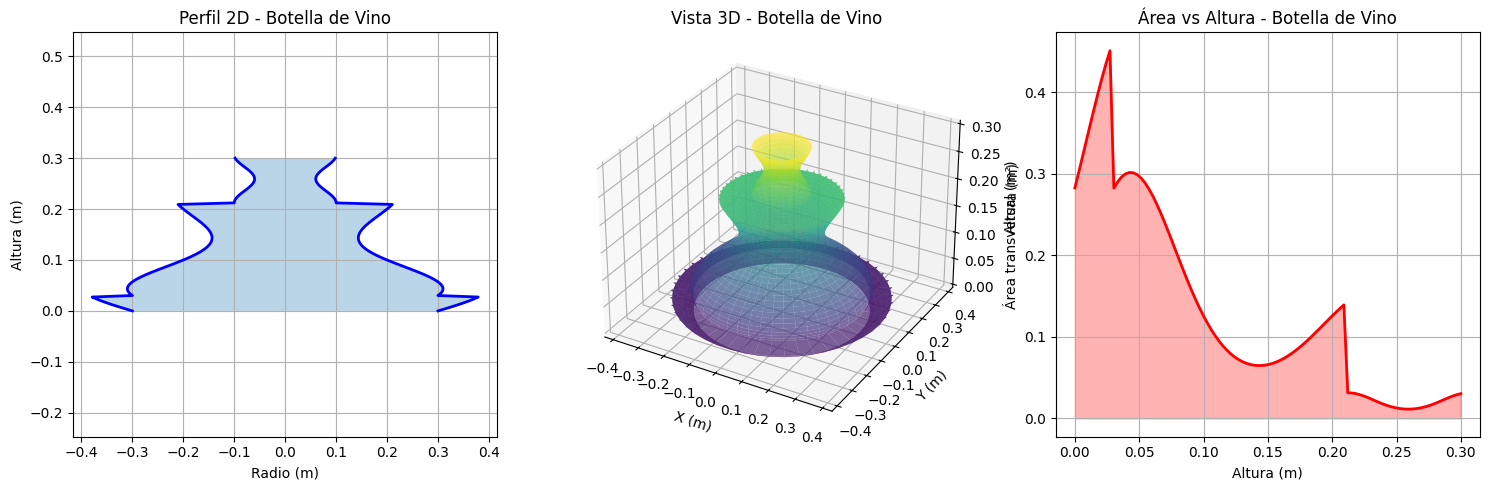

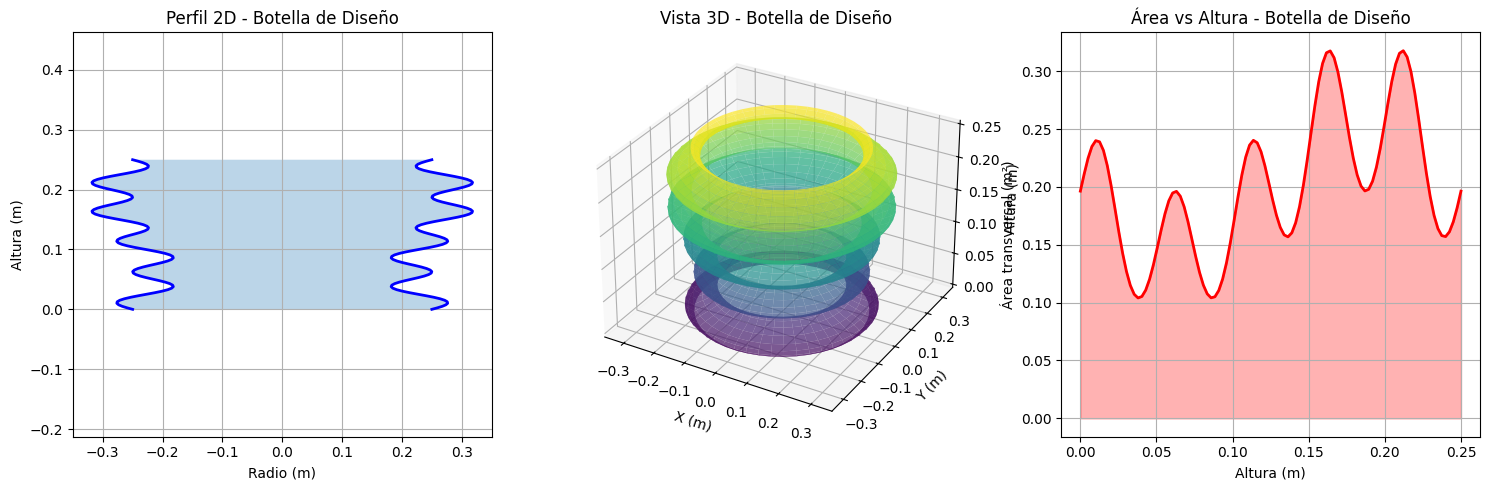

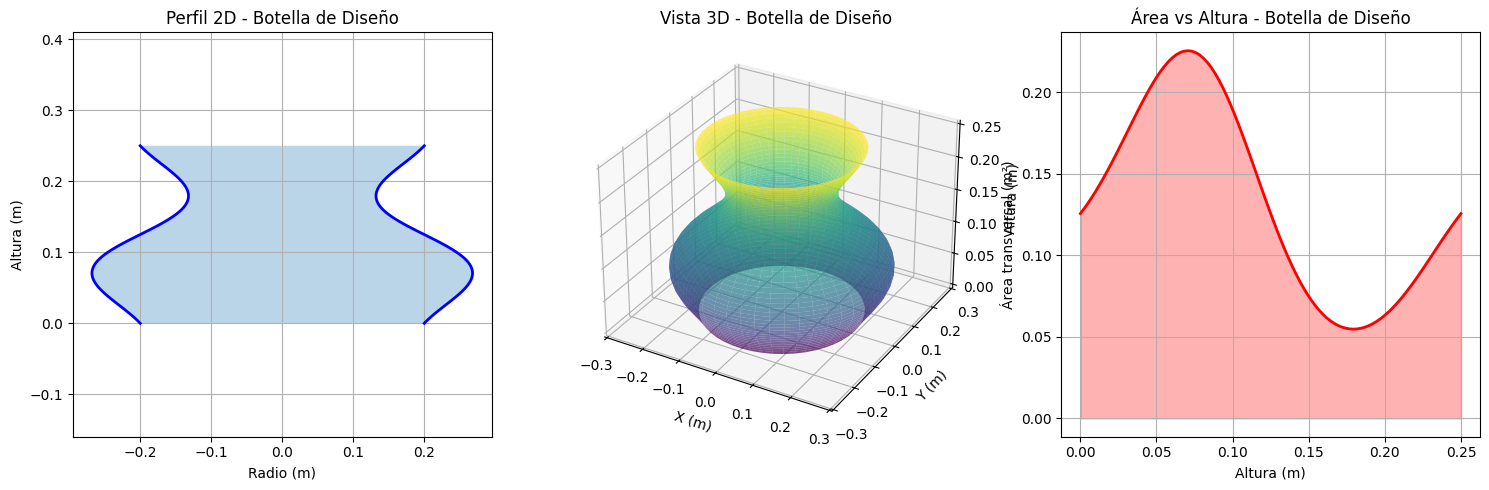


Optimizando para volumen objetivo...

--- ANÁLISIS DE OPTIMIZACIÓN ---
Volumen objetivo: 500 ml
Escala óptima: 2.000
Error: 181.73 ml

          INFORME DE DISEÑO DE ENVASES

--- BOTELLA DE VINO ---
Volumen: 89.0 ml
Volumen: 0.089024 m³
Altura: 0.300 m
Error de integración: 1.31e-09
Capacidad aproximada: 0.089 litros

--- BOTELLA DE DISEÑO ---
Volumen: 42.7 ml
Volumen: 0.042692 m³
Altura: 0.250 m
Error de integración: 4.74e-16
Capacidad aproximada: 0.043 litros

--- ENVASE ERGONÓMICO ---
Volumen: 33.2 ml
Volumen: 0.033176 m³
Altura: 0.200 m
Error de integración: 3.68e-16
Capacidad aproximada: 0.033 litros

--- OPTIMIZACION_1.00 ---
Volumen: 79.6 ml
Volumen: 0.079567 m³
Altura: 0.250 m
Error de integración: 2.63e-13
Capacidad aproximada: 0.080 litros

--- OPTIMIZACION_2.00 ---
Volumen: 318.3 ml
Volumen: 0.318268 m³
Altura: 0.250 m
Error de integración: 1.05e-12
Capacidad aproximada: 0.318 litros

ANÁLISIS DE SENSIBILIDAD


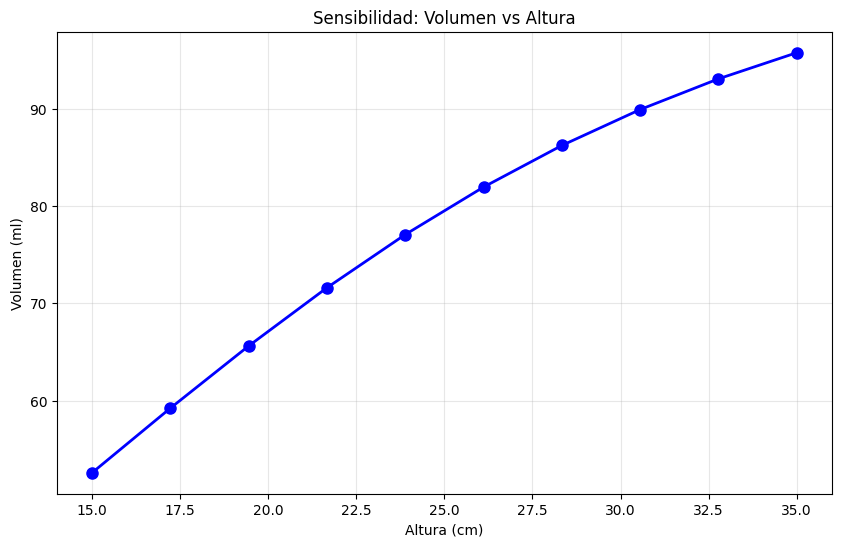


¡Diseño completado! Revise los gráficos y el reporte.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

class DiseñoEnvases:
    """
    Clase para calcular volúmenes de envases asimétricos usando integrales
    """

    def __init__(self):
        self.resultados = {}

    def volumen_por_secciones(self, radio_func, altura_total, num_secciones=1000):
        """
        Calcula volumen usando el método de discos para formas irregulares
        """
        def area_seccion(z):
            return np.pi * (radio_func(z))**2

        volumen, error = integrate.quad(area_seccion, 0, altura_total)
        return volumen, error

    def perfil_botella_vino(self, z):
        """
        Perfil típico de una botella de vino asimétrica
        z: altura normalizada (0 a 1)
        """
        # Base ancha, cuello estrecho, ligera asimetría
        if z < 0.1:  # Base
            return 0.3 + 0.1 * np.sin(10 * z)
        elif z < 0.7:  # Cuerpo
            return 0.2 + 0.15 * np.sin(3 * np.pi * z) * np.exp(-2 * z)
        else:  # Cuello
            return 0.08 + 0.02 * np.sin(20 * z)

    def perfil_botella_design(self, z):
        """
        Botella de diseño asimétrico moderna
        """
        # Forma orgánica asimétrica
        return 0.25 * (1 + 0.3 * np.sin(4 * np.pi * z) * np.cos(6 * np.pi * z))

    def perfil_envase_ergonomico(self, z):
        """
        Envase ergonómico para mejor agarre
        """
        # Curvas suaves para comodidad
        return 0.2 * (1 + 0.4 * np.sin(2 * np.pi * z) * np.exp(-3 * (z - 0.5)**2))

    def calcular_volumen_envase(self, perfil_func, altura_real, nombre):
        """
        Calcula volumen para un perfil específico
        """
        # Normalizar función para altura real
        def radio_normalizado(z_normalizado):
            z_real = z_normalizado * altura_real
            return perfil_func(z_normalizado)

        volumen, error = self.volumen_por_secciones(
            radio_normalizado, altura_real
        )

        self.resultados[nombre] = {
            'volumen_ml': volumen * 1000,  # Convertir a ml
            'volumen_m3': volumen,
            'error': error,
            'altura': altura_real
        }

        return volumen * 1000  # Volumen en ml

    def visualizar_perfil(self, perfil_func, altura, nombre, num_puntos=100):
        """
        Visualiza el perfil 2D y 3D del envase
        """
        fig = plt.figure(figsize=(15, 5))

        # Perfil 2D
        z_values = np.linspace(0, 1, num_puntos)
        radios = [perfil_func(z) for z in z_values]
        alturas_reales = z_values * altura

        ax1 = fig.add_subplot(131)
        ax1.plot(radios, alturas_reales, 'b-', linewidth=2)
        ax1.plot([-r for r in radios], alturas_reales, 'b-', linewidth=2)
        ax1.fill_betweenx(alturas_reales, radios, -np.array(radios), alpha=0.3)
        ax1.set_xlabel('Radio (m)')
        ax1.set_ylabel('Altura (m)')
        ax1.set_title(f'Perfil 2D - {nombre}')
        ax1.grid(True)
        ax1.axis('equal')

        # Vista 3D
        ax2 = fig.add_subplot(132, projection='3d')

        theta = np.linspace(0, 2*np.pi, 50)
        Z, Theta = np.meshgrid(alturas_reales, theta)
        R = np.array([perfil_func(z/altura) for z in Z[0]])
        R_mesh = np.tile(R, (len(Theta), 1))

        X = R_mesh * np.cos(Theta)
        Y = R_mesh * np.sin(Theta)

        ax2.plot_surface(X, Y, Z, alpha=0.7, cmap='viridis')
        ax2.set_xlabel('X (m)')
        ax2.set_ylabel('Y (m)')
        ax2.set_zlabel('Altura (m)')
        ax2.set_title(f'Vista 3D - {nombre}')

        # Gráfico de área transversal
        ax3 = fig.add_subplot(133)
        areas = [np.pi * (perfil_func(z))**2 for z in z_values]
        ax3.plot(alturas_reales, areas, 'r-', linewidth=2)
        ax3.fill_between(alturas_reales, areas, alpha=0.3, color='red')
        ax3.set_xlabel('Altura (m)')
        ax3.set_ylabel('Área transversal (m²)')
        ax3.set_title(f'Área vs Altura - {nombre}')
        ax3.grid(True)

        plt.tight_layout()
        plt.show()

    def analizar_optimizacion(self, volumen_objetivo_ml, altura_maxima):
        """
        Encuentra dimensiones óptimas para un volumen objetivo
        """
        def objetivo(escala):
            def perfil_escalado(z):
                return self.perfil_botella_vino(z) * escala

            # Extract scalar value from the NumPy array for formatting
            escala_scalar = escala.item() if isinstance(escala, np.ndarray) else escala

            volumen_ml = self.calcular_volumen_envase(
                perfil_escalado, altura_maxima, f"Optimizacion_{escala_scalar:.2f}"
            )
            return abs(volumen_ml - volumen_objetivo_ml)

        from scipy.optimize import minimize

        resultado = minimize(objetivo, x0=1.0, bounds=[(0.5, 2.0)])
        escala_optima = resultado.x[0]

        print(f"\n--- ANÁLISIS DE OPTIMIZACIÓN ---")
        print(f"Volumen objetivo: {volumen_objetivo_ml} ml")
        print(f"Escala óptima: {escala_optima:.3f}")
        print(f"Error: {resultado.fun:.2f} ml")

        return escala_optima

    def generar_reporte(self):
        """
        Genera un reporte completo de todos los envases calculados
        """
        print("\n" + "="*60)
        print("          INFORME DE DISEÑO DE ENVASES")
        print("="*60)

        for nombre, datos in self.resultados.items():
            print(f"\n--- {nombre.upper()} ---")
            print(f"Volumen: {datos['volumen_ml']:.1f} ml")
            print(f"Volumen: {datos['volumen_m3']:.6f} m³")
            print(f"Altura: {datos['altura']:.3f} m")
            print(f"Error de integración: {datos['error']:.2e}")
            print(f"Capacidad aproximada: {datos['volumen_ml']/1000:.3f} litros")

# Verificar tolerancias de volumen
def verificar_tolerancia(volumen_calculado, volumen_objetivo, tolerancia_porcentaje=2):
    diferencia_porcentaje = abs(volumen_calculado - volumen_objetivo) / volumen_objetivo * 100
    return diferencia_porcentaje <= tolerancia_porcentaje

def calcular_area_superficie(perfil_func, altura):
    """Calcula área de superficie para optimizar material"""
    def derivada_radio(z):
        # Aproximación numérica de la derivada
        h = 1e-6
        return (perfil_func(z + h) - perfil_func(z)) / h

    def integrando_area(z):
        r = perfil_func(z)
        dr_dz = derivada_radio(z)
        return 2 * np.pi * r * np.sqrt(1 + dr_dz**2)

    area, _ = integrate.quad(integrando_area, 0, altura)
    return area


# EJEMPLO DE USO COMPLETO
def ejemplo_aplicacion():
    """
    Ejemplo práctico de diseño de envases asimétricos
    """
    diseñador = DiseñoEnvases()

    # 1. Botella de vino estándar (750 ml)
    print("Calculando botella de vino...")
    volumen_vino = diseñador.calcular_volumen_envase(
        diseñador.perfil_botella_vino,
        altura_real=0.3,  # 30 cm
        nombre="Botella de Vino"
    )

    # 2. Botella de diseño moderno
    print("Calculando botella de diseño...")
    volumen_design = diseñador.calcular_volumen_envase(
        diseñador.perfil_botella_design,
        altura_real=0.25,  # 25 cm
        nombre="Botella de Diseño"
    )

    # 3. Envase ergonómico
    print("Calculando envase ergonómico...")
    volumen_ergo = diseñador.calcular_volumen_envase(
        diseñador.perfil_envase_ergonomico,
        altura_real=0.2,  # 20 cm
        nombre="Envase Ergonómico"
    )

    # Visualizaciones
    print("\nGenerando visualizaciones...")
    diseñador.visualizar_perfil(
        diseñador.perfil_botella_vino, 0.3, "Botella de Vino"
    )

    diseñador.visualizar_perfil(
        diseñador.perfil_botella_design, 0.25, "Botella de Diseño"
    )

    diseñador.visualizar_perfil(
        diseñador.perfil_envase_ergonomico, 0.25, "Botella de Diseño"
    )
    # Optimización para volumen específico
    print("\nOptimizando para volumen objetivo...")
    escala_optima = diseñador.analizar_optimizacion(
        volumen_objetivo_ml=500,  # 500 ml
        altura_maxima=0.25
    )

    # Reporte final
    diseñador.generar_reporte()
    #analisis_sensibilidad()

    return diseñador

# FUNCIONES ADICIONALES PARA ANÁLISIS AVANZADO
def analisis_sensibilidad():
    """
    Analiza cómo cambia el volumen con variaciones en el perfil
    """
    diseñador = DiseñoEnvases()

    alturas = np.linspace(0.15, 0.35, 10)
    volumenes = []

    for altura in alturas:
        vol = diseñador.calcular_volumen_envase(
            diseñador.perfil_botella_vino, altura, f"Altura_{altura:.2f}"
        )
        volumenes.append(vol)

    plt.figure(figsize=(10, 6))
    plt.plot(alturas * 100, volumenes, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Altura (cm)')
    plt.ylabel('Volumen (ml)')
    plt.title('Sensibilidad: Volumen vs Altura')
    plt.grid(True, alpha=0.3)
    plt.show()

# EJECUTAR EJEMPLO COMPLETO
if __name__ == "__main__":
    print("PROGRAMA DE DISEÑO DE ENVASES ASIMÉTRICOS")
    print("Usando Cálculo Integral para Volúmenes Irregulares")
    print("="*50)

    # Ejemplo principal
    diseñador = ejemplo_aplicacion()

    # Análisis adicional
    print("\n" + "="*50)
    print("ANÁLISIS DE SENSIBILIDAD")
    print("="*50)
    analisis_sensibilidad()

    print("\n¡Diseño completado! Revise los gráficos y el reporte.")